<a href="https://colab.research.google.com/github/eduardocoraca/doc/blob/main/PME_EduardoCora%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.integrate
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Funções auxiliares

In [2]:
def max_entropia(mu, phi_x, x_max, x_min):
  # funções auxiliares
  def p_lnp(input):
    # cálculo de p(x)*ln(p(x))
    return p_x(input)*np.log(1e-5 + p_x(input))

  def p_x(input):
    # cálculo de p(x)
    return np.exp(-np.matmul(l,phi_x(input)))

  def phi_p(input):
    # produto phi_n(x)*p(x)
    return phi_x(input)*p_x(input)

  def gnk_x(input):
    gnk = np.zeros((N+1,N+1))
    for n in range(N+1):
      for k in range(N+1):
        gnk[n,k] = phi_x(input)[n]*phi_x(input)[k]*p_x(input)
    return gnk

  def gn_Gnk_p(x_min, x_max):
    # l: vetor de N+1 multiplicadores lambda_n
    N = len(l) - 1 # determinando a quantidade de multiplicadores (N)
    Gn = scipy.integrate.quad_vec(phi_p, x_min, x_max, epsabs=0)[0]
    gnk = -scipy.integrate.quad_vec(gnk_x, x_min, x_max,epsabs=0)[0]
    return Gn, gnk

  # determinando N
  N = len(mu) - 1

  # inicialização
  l = 0.1*np.ones(N+1)
  eps = 1e-3   # criterio de parada

  # loop principal
  iterar = True
  it = 1  # contador de iterações
  h = []  # lista com as entropias por iteração
  
  while iterar == True:
    gn, Gnk = gn_Gnk_p(x_min, x_max)  # calculo do vetor g[n] e a matriz G[n,k]
    v = mu - gn   # calculo do vetor v
    delta = np.linalg.solve(Gnk,v)  # calculo de delta
    l = l + delta   # atualização de lambda
    h.append(-scipy.integrate.quad_vec(p_lnp, x_min, x_max, epsabs=0)[0])  # armazena a entropia da iteração
    print(f'Iteração: {it}, max(delta) = {np.abs(delta).max()}')
    it +=1 
    if np.abs(delta).max() < eps:
      iterar = False

  # criando uma lista com os valores de x para plotar
  x_min_plot = x_min
  x_max_plot = x_max
  if x_max == np.inf:
    x_max_plot = 1e2
  if x_min == -np.inf:
    x_min_plot = -1e2 
  dx = 1e-2
  x = np.arange(x_min_plot, x_max_plot, dx)

  # montando uma lista de valores p(x)
  p = list(map(lambda x: p_x(x), x))
  return l, p, h, x

# Exemplos

## Exemplo 1

In [3]:
def phi_x(input):
  return np.array([1])

In [4]:
x_min = 0
x_max = 2

l,p,h,x = max_entropia(mu = [1],
                     phi_x = phi_x,
                     x_min = x_min,
                     x_max = x_max)

print(f'Entropia: {h[-1]:.4f}')
print(f'Lambda: {l}')

Iteração: 1, max(delta) = 0.4474145409621762
Iteração: 2, max(delta) = 0.1356112243758091
Iteração: 3, max(delta) = 0.010070366073956342
Iteração: 4, max(delta) = 5.104784501808382e-05
Entropia: 0.6931
Lambda: [0.69314718]


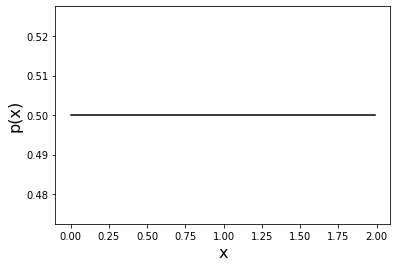

In [5]:
plt.plot(x, p, 'k')
plt.ylabel('p(x)', fontsize=16);
plt.xlabel('x', fontsize=16);

## Exemplo 2

In [6]:
def phi_x(input):
  return np.array([1, input])

In [7]:
x_min = 0
x_max = 10

l,p,h,x = max_entropia(mu = [1, 2],
                     phi_x = phi_x,
                     x_min = x_min,
                     x_max = x_max)

print(f'Entropia: {h[-1]:.4f}')
print(f'Lambda: {l}')

Iteração: 1, max(delta) = 0.6242945103480034
Iteração: 2, max(delta) = 0.2409270718626499
Iteração: 3, max(delta) = 0.12666297579131122
Iteração: 4, max(delta) = 0.11290716235127124
Iteração: 5, max(delta) = 0.026227512097531457
Iteração: 6, max(delta) = 0.0013331230185227197
Iteração: 7, max(delta) = 3.7630017666701158e-06
Entropia: 1.6856
Lambda: [0.72550385 0.48010075]


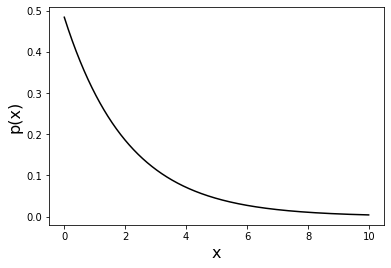

In [8]:
plt.plot(x, p, 'k')
plt.ylabel('p(x)', fontsize=16);
plt.xlabel('x', fontsize=16);

## Exemplo 3

In [9]:
def phi_x(input):
  return np.array([1, input, input**2])

In [10]:
x_min = 0
x_max = 10

l,p,h,x = max_entropia(mu = [1, 1, 3],
                     phi_x = phi_x,
                     x_min = x_min,
                     x_max = x_max)

print(f'Entropia: {h[-1]:.4f}')
print(f'Lambda: {l}')

Iteração: 1, max(delta) = 0.8868301317426659
Iteração: 2, max(delta) = 0.3357958663927572
Iteração: 3, max(delta) = 0.1777274201722426
Iteração: 4, max(delta) = 0.028456253094417322
Iteração: 5, max(delta) = 0.0005979737624490253
Entropia: 0.9347
Lambda: [-0.28755738  1.52940765 -0.10235709]


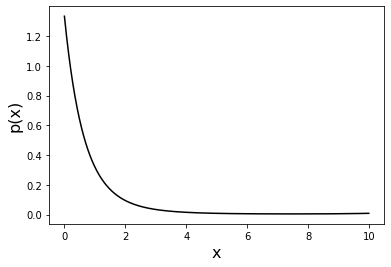

In [11]:
plt.plot(x, p, 'k')
plt.ylabel('p(x)', fontsize=16);
plt.xlabel('x', fontsize=16);

## Exemplo 4

In [12]:
def phi_x(input):
  return np.array([1, input])

In [13]:
x_min = 0
x_max = np.inf

l,p,h,x = max_entropia(mu = [1, 2],
                     phi_x = phi_x,
                     x_min = x_min,
                     x_max = x_max)

print(f'Entropia: {h[-1]:.4f}')
print(f'Lambda: {l}')

Iteração: 1, max(delta) = 0.8010692347463834
Iteração: 2, max(delta) = 0.5223515204292389
Iteração: 3, max(delta) = 0.05301190349052884
Iteração: 4, max(delta) = 0.3152520303312221
Iteração: 5, max(delta) = 0.28094266003120283
Iteração: 6, max(delta) = 0.14285030236919807
Iteração: 7, max(delta) = 0.03897256697448007
Iteração: 8, max(delta) = 0.0030326861770897232
Iteração: 9, max(delta) = 2.054592461568245e-05
Entropia: 1.6929
Lambda: [0.69314718 0.5       ]


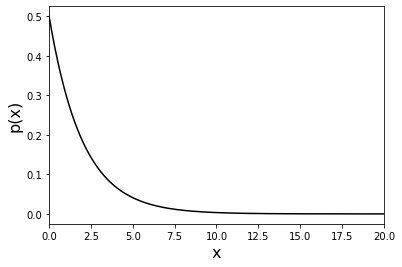

In [14]:
plt.plot(x, p, 'k')
plt.ylabel('p(x)', fontsize=16);
plt.xlabel('x', fontsize=16);
plt.xlim([0,20]);

## Exemplo 5

In [15]:
def phi_x(input):
  return np.array([1, input, input**2])

In [16]:
x_min = -np.inf
x_max = np.inf

l,p,h,x = max_entropia(mu = [1, 1, 2],
                     phi_x = phi_x,
                     x_min = x_min,
                     x_max = x_max)

print(f'Entropia: {h[-1]:.4f}')
print(f'Lambda: {l}')

Iteração: 1, max(delta) = 0.7468747124079042
Iteração: 2, max(delta) = 0.44873822147145864
Iteração: 3, max(delta) = 0.1711882352973894
Iteração: 4, max(delta) = 0.2429299742030543
Iteração: 5, max(delta) = 0.2694338781526777
Iteração: 6, max(delta) = 0.1953531980570056
Iteração: 7, max(delta) = 0.06293618959239443
Iteração: 8, max(delta) = 0.004680992952311505
Iteração: 9, max(delta) = 2.3495425718118423e-05
Entropia: 1.4188
Lambda: [ 1.41893853 -1.          0.5       ]


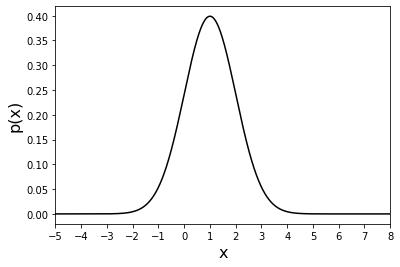

In [17]:
plt.plot(x, p, 'k')
plt.ylabel('p(x)', fontsize=16);
plt.xlabel('x', fontsize=16);
plt.xticks(np.arange(-10,10,1))
plt.xlim([-5,8]);


## Exemplo 6

In [18]:
def phi_x(input):
  return np.array([1, input, np.log(input+1e-5)])

In [19]:
x_min = 0
x_max = np.inf

l,p,h,x = max_entropia(mu = [1, 3, 1],
                     phi_x = phi_x,
                     x_min = x_min,
                     x_max = x_max)

print(f'Entropia: {h[-1]:.4f}')
print(f'Lambda: {l}')

Iteração: 1, max(delta) = 0.8021441376601275
Iteração: 2, max(delta) = 0.5388395568921048
Iteração: 3, max(delta) = 0.19439043421051647
Iteração: 4, max(delta) = 0.447598011626052
Iteração: 5, max(delta) = 0.7422488207411999
Iteração: 6, max(delta) = 1.0105430620188547
Iteração: 7, max(delta) = 1.0475057308306241
Iteração: 8, max(delta) = 0.6466598195716553
Iteração: 9, max(delta) = 0.15369751713548738
Iteração: 10, max(delta) = 0.0066050389910026555
Iteração: 11, max(delta) = 1.1550892580691504e-05
Entropia: 1.6233
Lambda: [ 0.62342452  1.74371041 -4.23114867]


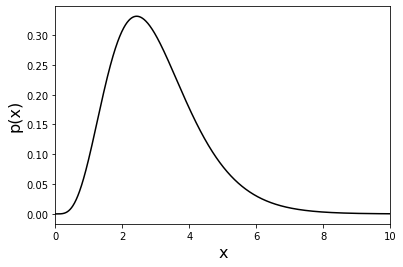

In [20]:
plt.plot(x, p, 'k')
plt.ylabel('p(x)', fontsize=16);
plt.xlabel('x', fontsize=16);
plt.xlim([0,10]);
plt.savefig('ex6.eps', format='eps')